In [1]:
import pickle
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import utils_general
from utils_prompts import load_prompts

# LOAD DATA

In [4]:
df = pd.read_csv("data/fin_average_df_examples_marked.csv")
ppl_df = pd.read_csv("ppl_results/fin_ppl.csv")
results_df = pd.read_csv("grading_results/llama_3_1_8b_fin.csv")

with open('embeddings/llama3_1_8b_fin.pkl', 'rb') as f:
    sample_to_embedding  = pickle.load(f)

# dictionaries to map sample to demonstration samples
one_shot_sample_to_demonstration = load_prompts('prompts/sample_to_one_shot_demonstration_llama3_fin_asr.json')
few_shot_sample_to_demonstration = load_prompts('prompts/sample_to_few_shot_demonstration_llama3_fin_asr.json')

model_name_short = 'llama3_1_8b'

In [5]:
results_df = utils_general.add_sample_characteristics(results_df, 
                                                      df, 
                                                      sample_to_embedding, 
                                                      ppl_df, 
                                                      model_name_short,
                                                      one_shot_sample_to_demonstration,
                                                      few_shot_sample_to_demonstration)

# PRINT RESULTS
1. [x] results for the table
2. [x] entropy plots

## overall results

In [6]:
utils_general.print_results(results_df)

Shot type: zero_shot_prompt
S win rate: 12/49
Average entropy:  0.7481822850465155
Acc: 0.26, F1: 0.15, QWK: 0.21, MAE: 1.63
Acc: 0.24, F1: 0.14, QWK: 0.23, MAE: 1.68
Shot type: one_shot_prompt_random
S win rate: 23/40
Average entropy:  0.8558547047430186
Acc: 0.24, F1: 0.18, QWK: 0.39, MAE: 1.34
Acc: 0.26, F1: 0.18, QWK: 0.43, MAE: 1.29
Shot type: few_shot_prompt_random
S win rate: 74/117
Average entropy:  1.1928010110515095
Acc: 0.31, F1: 0.24, QWK: 0.61, MAE: 1.05
Acc: 0.36, F1: 0.30, QWK: 0.67, MAE: 0.93


## entropy plots

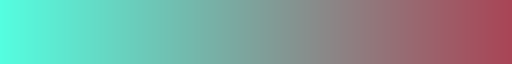

In [7]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54fee0','#a94556'])
cmap

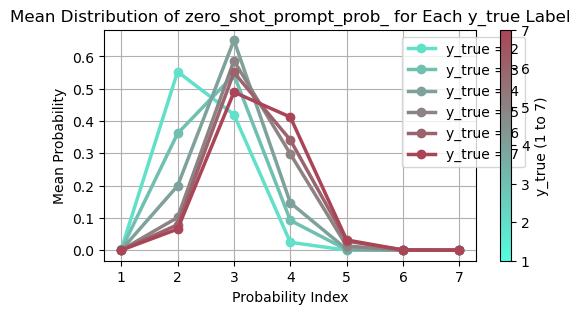

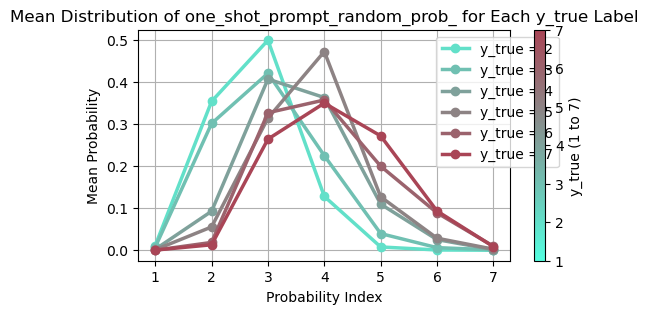

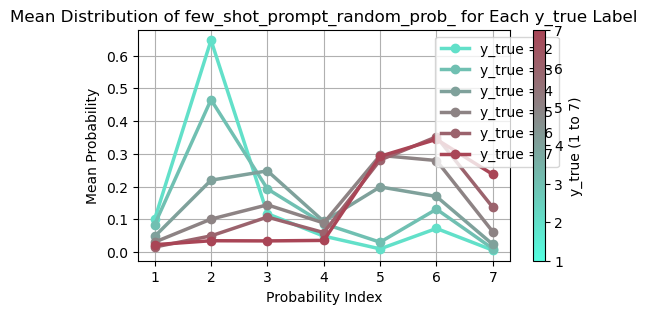

In [8]:
for prompt in ['zero_shot_prompt_prob_',
              'one_shot_prompt_random_prob_',
              'few_shot_prompt_random_prob_']:

    utils_general.plot_mean_distribution(results_df,
                                         prob_prefix=prompt,
                                         cmap=cmap,
                                         save_as_svg=True)

# COMPARE DISTRIBUTIONS
compare the difference between samples with same vs diff soft-hard predictions

**zero-shot**
- entropy
- ppl
- human var
- cefr

**one-shot**
- entropy
- ppl
- human var
- cefr
- example dist

**few-shot**
- entropy
- ppl
- human var
- cefr
- example dist

In [10]:
tests = []

chars = [['zero_shot_prompt_entropy', 'zero_ppl', 'human_var', 'y_true_mean'],
         ['one_shot_prompt_random_entropy','one_ppl', 'human_var', 'y_true_mean', 'one_shot_dist'],
         ['few_shot_prompt_random_entropy', 'few_ppl', 'human_var', 'y_true_mean', 'av_dist'],

] 
 

for i, pair in enumerate([['zero_shot_prompt_prediction', 'zero_shot_prompt_soft_prediction_bin'],
                          ['one_shot_prompt_random_prediction', 'one_shot_prompt_random_soft_prediction_bin'],
                          ['few_shot_prompt_random_prediction', 'few_shot_prompt_random_soft_prediction_bin']]):

    test = utils_general.compare_distributions(results_df, pair[0], pair[1], chars[i])
    tests.append(test)
    print("----------------\n")

276 49
zero_shot_prompt_entropy
0.7410862985152189 0.7881515153044313
zero_ppl
24.62745291557971 30.98706006530612
human_var
0.2305231884057971 0.273265306122449
y_true_mean
4.3331884057971015 3.642857142857143
----------------

285 40
one_shot_prompt_random_entropy
0.8387290017670904 0.9778753384465068
one_ppl
19.599796450877193 23.90548923
human_var
0.2360154385964912 0.24375
y_true_mean
4.238456140350877 4.1625
one_shot_dist
0.067 0.06323
----------------

208 117
few_shot_prompt_random_entropy
1.0828526164608077 1.388264823657202
few_ppl
16.911150595192307 15.322418069230771
human_var
0.2669326923076923 0.1836957264957265
y_true_mean
4.265384615384615 4.164615384615384
av_dist
0.06586 0.0634
----------------



In [12]:
for test in tests:
    for key in test:
        print(key, test[key])
    print("----------------\n")

zero_shot_prompt_entropy {'significance': 'yes', 'median_comparison': 'split_column_1 <= split_column_2'}
zero_ppl {'significance': 'yes', 'median_comparison': 'split_column_1 <= split_column_2'}
human_var {'significance': 'no', 'median_comparison': 'N/A'}
y_true_mean {'significance': 'yes', 'median_comparison': 'split_column_1 > split_column_2'}
----------------

one_shot_prompt_random_entropy {'significance': 'yes', 'median_comparison': 'split_column_1 <= split_column_2'}
one_ppl {'significance': 'no', 'median_comparison': 'N/A'}
human_var {'significance': 'no', 'median_comparison': 'N/A'}
y_true_mean {'significance': 'no', 'median_comparison': 'N/A'}
one_shot_dist {'significance': 'no', 'median_comparison': 'N/A'}
----------------

few_shot_prompt_random_entropy {'significance': 'yes', 'median_comparison': 'split_column_1 <= split_column_2'}
few_ppl {'significance': 'no', 'median_comparison': 'N/A'}
human_var {'significance': 'no', 'median_comparison': 'N/A'}
y_true_mean {'significa

# DISCUSSION
1. [x] ppl-to-ppl
2. [x] ppl to wer
3. [x] ppl to cefr
4. [x] entropy to cefr

## 1: PPL relationships

In [18]:
results_df['zero_ppl'].corr(results_df['one_ppl'], method='spearman')

np.float64(0.9742502578085401)

In [19]:
results_df['zero_ppl'].corr(results_df['few_ppl'], method='spearman')

np.float64(0.941411567301138)

In [20]:
results_df['one_ppl'].corr(results_df['few_ppl'], method='spearman')

np.float64(0.9737300963067835)

## 2: ppl to wer

In [21]:
results_df['wer'] = [df[df['sample']==sample]['wer'].values[0] for sample in results_df['sample']]

In [22]:
results_df['wer'].corr(results_df['zero_ppl'], method = 'spearman')

np.float64(0.7549174418614426)

## 3: ppl to cefr

In [24]:
results_df['y_true_mean'].corr(results_df['zero_ppl'], method = 'spearman')

np.float64(-0.5919981846747443)

## 4: wer to cefr

In [25]:
results_df['y_true_mean'].corr(results_df['wer'], method = 'spearman')

np.float64(-0.46181237157310284)

## 5: entropy to cefr

In [26]:
for ent in entropies:
    print(ent)
    print(results_df['y_true_mean'].corr(results_df[ent], method = 'spearman'))
    print("------")

zero_shot_prompt_entropy
0.3484438685420342
------
one_shot_prompt_random_entropy
0.32513760172669615
------
few_shot_prompt_random_entropy
0.15218160649440077
------
